In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

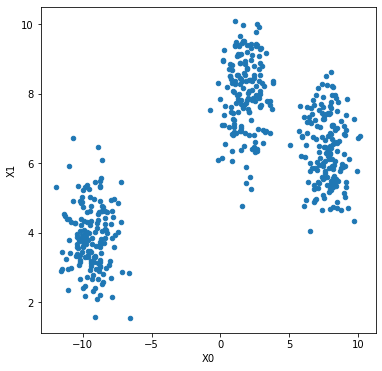

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(6,6))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [5]:
#Intialize the centroids of k clusters randomly from a uniform distribution
#asarray to convert list to array 
def initialize_centroids(k, X):
    arr = []
    for i in range(k):
        c1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        c2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([c1, c2])
    return np.asarray(arr)

In [6]:
#Calculate euclidean distance
def euclidean_dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [13]:
#Categorize(Assign centroids) all the points in the data into a cluster based on distance
def assign_centroid(k, X, centroids):
    closest_centroid = [-1]*len(X) #defines the closest centroid to each data point
    for i in range(len(X)):
        distance_arr = []
        for j in range(k):
            distance_arr.append(euclidean_dist(X[i], centroids[j]))
        idx = np.argmin(distance_arr) #Get index of the array with least value
        closest_centroid[i] = idx
    return np.asarray(closest_centroid)

In [8]:
# Recomputing the centroids based on data points
def recompute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)): # Get all the points from a particular cluster
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0)) #Recompute the centroid
    return np.asarray(cg_arr) # Return centroids of 3 clusters

In [15]:
#Stop-condition
def measure_change(prev_centroids, new_centroids):
    res = 0
    for a,b in zip(prev_centroids, new_centroids): #Zip allows to iterate over 2 arrays simultaneously
        res+=euclidean_dist(a,b)
    return res

In [11]:
#Plotting the clusters
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(6, 6))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

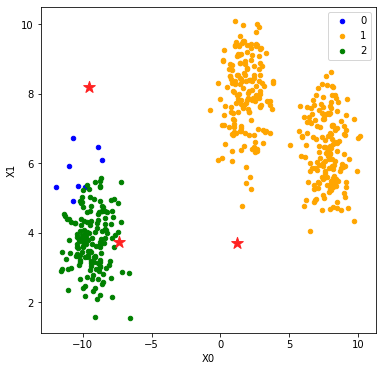

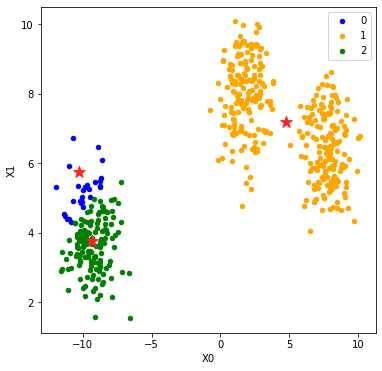

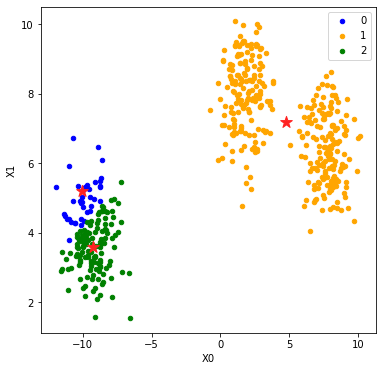

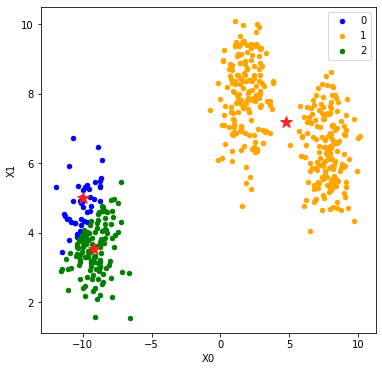

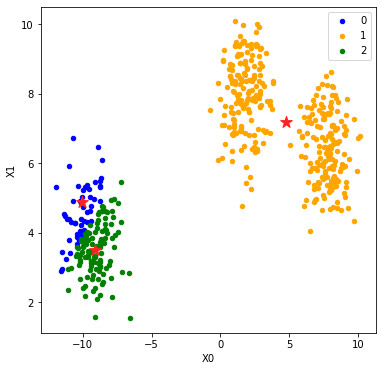

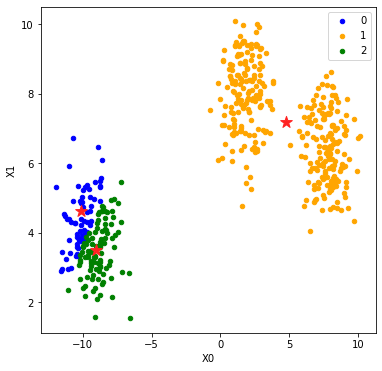

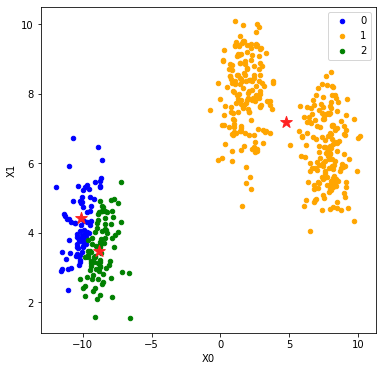

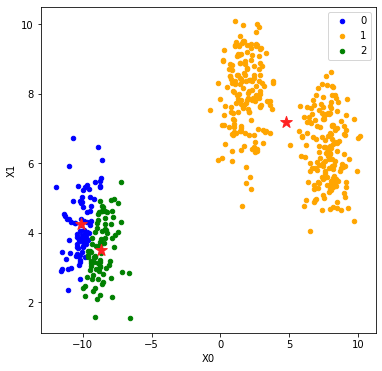

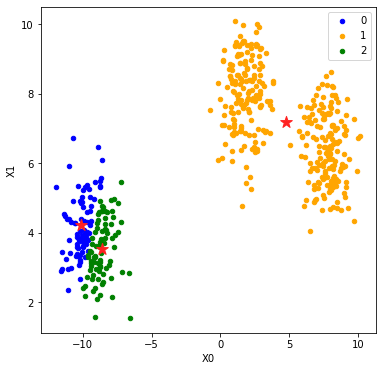

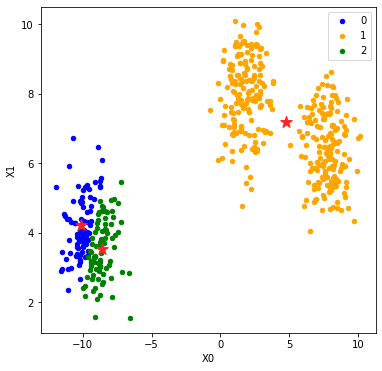

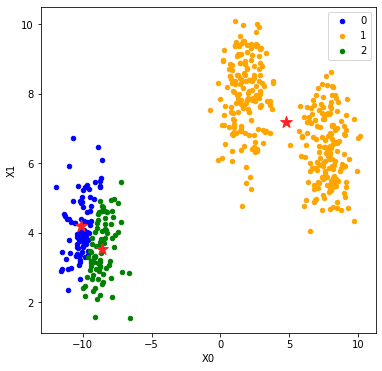

In [16]:
def k_means(k, X):
    cg_prev = initialize_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100 #Stopping Criteria
    while cg_change>.001:
        cluster = assign_centroid(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = recompute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(3, X)